In [1]:
kaggle_url = 'https://www.kaggle.com/jboysen/london-crime/data'

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
import json
import folium

In [5]:
crorig = pd.read_csv('london_crime_by_lsoa.csv')

crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [6]:
crorig.count()

lsoa_code         13490604
borough           13490604
major_category    13490604
minor_category    13490604
value             13490604
year              13490604
month             13490604
dtype: int64

In [7]:
crorig['borough'].unique()

array(['Croydon', 'Greenwich', 'Bromley', 'Redbridge', 'Wandsworth',
       'Ealing', 'Hounslow', 'Newham', 'Sutton', 'Haringey', 'Lambeth',
       'Richmond upon Thames', 'Hillingdon', 'Havering',
       'Barking and Dagenham', 'Kingston upon Thames', 'Westminster',
       'Hackney', 'Enfield', 'Harrow', 'Lewisham', 'Brent', 'Southwark',
       'Barnet', 'Waltham Forest', 'Camden', 'Bexley',
       'Kensington and Chelsea', 'Islington', 'Tower Hamlets',
       'Hammersmith and Fulham', 'Merton', 'City of London'], dtype=object)

In [8]:
crorig['borough'].value_counts()[:10]

Croydon       602100
Barnet        572832
Ealing        549396
Bromley       523908
Lambeth       519048
Enfield       511164
Wandsworth    498636
Brent         490644
Lewisham      485136
Southwark     483300
Name: borough, dtype: int64

In [9]:
crlam = crorig[crorig['borough'] == 'Lambeth']

crlam.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
11,E01003076,Lambeth,Violence Against the Person,Other violence,0,2015,4
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
67,E01003019,Lambeth,Violence Against the Person,Assault with Injury,2,2008,5
122,E01003067,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,4


In [10]:
crlam['major_category'].value_counts()[:5]

Theft and Handling             150552
Violence Against the Person    120312
Criminal Damage                 76572
Drugs                           48060
Burglary                        38448
Name: major_category, dtype: int64

In [11]:
crlam = crlam[ (crlam['major_category'] == 'Violence Against the Person') & (crlam['year'] == 2016) ] 

crlam.head(10)

,lsoa_code,borough,major_category,minor_category,value,year,month
122,E01003067,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,4
160,E01003165,Lambeth,Violence Against the Person,Other violence,0,2016,7
574,E01003081,Lambeth,Violence Against the Person,Harassment,2,2016,8
1111,E01003045,Lambeth,Violence Against the Person,Wounding/GBH,1,2016,6
1736,E01003038,Lambeth,Violence Against the Person,Harassment,1,2016,9
2577,E01003015,Lambeth,Violence Against the Person,Assault with Injury,0,2016,6
2633,E01003084,Lambeth,Violence Against the Person,Common Assault,1,2016,10
3506,E01003073,Lambeth,Violence Against the Person,Assault with Injury,1,2016,2
3932,E01003024,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,6
5797,E01003178,Lambeth,Violence Against the Person,Other violence,0,2016,12


In [12]:
crlam['value'].sum()

10496

In [13]:
crlam['value'].count()

13368

In [14]:
crlampv = pd.pivot_table(crlam, values='value', index=['lsoa_code'], aggfunc=np.sum)

crlampv.head()

,value
lsoa_code,
E01003013,281
E01003014,55
E01003015,35
E01003016,88
E01003017,80


In [15]:
crlampv = crlampv.reset_index()

crlampv.head()

,lsoa_code,value
0,E01003013,281
1,E01003014,55
2,E01003015,35
3,E01003016,88
4,E01003017,80


In [16]:
back_map = folium.Map(
    [51.4571, -0.1231],
    zoom_start=11,
    tiles='Stamen Terrain'
    )

lsoa_geo = r'lsoalam.json'

map_lam = folium.Map(location=[51.4571, -0.1231], zoom_start=12)


map_lam.choropleth(geo_data=lsoa_geo, data=crlampv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.2,
             legend_name='Violence Against the Person in 2016',
             highlight=True)
             
map_lam

In [17]:
back_map = folium.Map(
    [51.4571, -0.1231],
    zoom_start=11,
    tiles='Stamen Terrain'
    )

lsoa_geo = json.load(open('./lsoalam.json'))

map_lam = folium.Map(location=[51.4571, -0.1231], zoom_start=12)

map_lam.choropleth(geo_data=lsoa_geo, data=crlampv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='YlGn', fill_opacity=0.6, line_opacity=0.3,
             legend_name='Violence Against the Person in 2016',
             highlight=True)       
map_lam

In [18]:
for feature in lsoa_geo['features']:
    print(feature['properties']['LSOA11CD'])
    
# working to allow lsoa_code as popups on map

E01003013
E01003014
E01003015
E01003016
E01003017
E01003018
E01003019
E01003020
E01003021
E01003022
E01003023
E01003024
E01003025
E01003026
E01003027
E01003028
E01003029
E01003030
E01003031
E01003032
E01003033
E01003034
E01003035
E01003036
E01003037
E01003038
E01003039
E01003040
E01003041
E01003042
E01003043
E01003044
E01003045
E01003046
E01003047
E01003048
E01003049
E01003050
E01003051
E01003052
E01003053
E01003054
E01003055
E01003056
E01003057
E01003058
E01003059
E01003060
E01003061
E01003062
E01003063
E01003064
E01003065
E01003066
E01003067
E01003068
E01003069
E01003070
E01003071
E01003072
E01003073
E01003074
E01003075
E01003076
E01003077
E01003078
E01003079
E01003080
E01003081
E01003082
E01003083
E01003084
E01003085
E01003086
E01003087
E01003088
E01003089
E01003090
E01003091
E01003092
E01003093
E01003094
E01003095
E01003096
E01003097
E01003098
E01003099
E01003100
E01003101
E01003102
E01003104
E01003105
E01003106
E01003107
E01003108
E01003109
E01003110
E01003111
E01003112
E01003113


In [19]:
crlamth = crorig[crorig['borough'] == 'Lambeth']

In [20]:
crlamth.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
11,E01003076,Lambeth,Violence Against the Person,Other violence,0,2015,4
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
67,E01003019,Lambeth,Violence Against the Person,Assault with Injury,2,2008,5
122,E01003067,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,4


In [21]:
crlamth = crlamth[crlamth['major_category'] == 'Theft and Handling']

crlamth.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
38,E01003067,Lambeth,Theft and Handling,Handling Stolen Goods,0,2010,8
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
132,E01003083,Lambeth,Theft and Handling,Other Theft,0,2010,4
339,E01003090,Lambeth,Theft and Handling,Theft From Shops,1,2010,3
358,E01003109,Lambeth,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,4


In [22]:
crtest = pd.pivot_table(crlamth,values='value',index=['year'],aggfunc=np.sum)

crtest

,value
year,
2008,10869
2009,10812
2010,11989
2011,13374
2012,15095
2013,13995
2014,12647
2015,12963
2016,13155


In [23]:
crlam10 = crlamth[crlamth['year'] == 2010]
crlam11 = crlamth[crlamth['year'] == 2011]
crlam12 = crlamth[crlamth['year'] == 2012]
crlam13 = crlamth[crlamth['year'] == 2013]

crlam13.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
47,E01003064,Lambeth,Theft and Handling,Theft From Shops,0,2013,7
358,E01003109,Lambeth,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,4
696,E01003169,Lambeth,Theft and Handling,Motor Vehicle Interference & Tampering,0,2013,2
747,E01003078,Lambeth,Theft and Handling,Theft/Taking Of Motor Vehicle,0,2013,10
1567,E01003173,Lambeth,Theft and Handling,Other Theft Person,0,2013,10


In [24]:
crlam10pv = pd.pivot_table(crlam10, values='value', index=['lsoa_code'], aggfunc=np.sum)
crlam11pv = pd.pivot_table(crlam11, values='value', index=['lsoa_code'], aggfunc=np.sum)
crlam12pv = pd.pivot_table(crlam12, values='value', index=['lsoa_code'], aggfunc=np.sum)
crlam13pv = pd.pivot_table(crlam13, values='value', index=['lsoa_code'], aggfunc=np.sum)

In [25]:
crlam10pv.reset_index(inplace=True)
crlam11pv.reset_index(inplace=True)
crlam12pv.reset_index(inplace=True)
crlam13pv.reset_index(inplace=True)

In [26]:
crlam10pv.head()

,lsoa_code,value
0,E01003013,555
1,E01003014,48
2,E01003015,59
3,E01003016,193
4,E01003017,232


In [27]:
back_map = folium.Map(
    [51.4571, -0.1231],
    zoom_start=11,
    tiles='Stamen Terrain'
    )

lsoa_geo = json.load(open('./lsoalam.json'))

In [28]:
map_10 = folium.Map(location=[51.4571, -0.1231], zoom_start=12)

map_10.choropleth(geo_data=lsoa_geo, data=crlam10pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='OrRd', fill_opacity=0.6, line_opacity=0.3,
             threshold_scale=[0,200,400,600,800],
             legend_name='Theft and Handling in 2010')       
map_10

In [29]:
map_11 = folium.Map(location=[51.4571, -0.1231], zoom_start=12)

map_11.choropleth(geo_data=lsoa_geo, data=crlam11pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='OrRd', fill_opacity=0.6, line_opacity=0.3,
             threshold_scale=[0,200,400,600,800],
             legend_name='Theft and Handling in 2011')       
map_11

In [30]:
map_12 = folium.Map(location=[51.4571, -0.1231], zoom_start=12)

map_12.choropleth(geo_data=lsoa_geo, data=crlam12pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.3,
             threshold_scale=[0,200,400,600,800],
             legend_name='Theft and Handling in 2012')       
map_12

In [31]:
map_13 = folium.Map(location=[51.4571, -0.1231], zoom_start=12)

map_13.choropleth(geo_data=lsoa_geo, data=crlam13pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.3,
             threshold_scale=[0,200,400,600,800],
             legend_name='Theft and Handling in 2013')       
map_13

Combining Lambeth & Southwark

In [32]:
crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [33]:
crsouth = crorig[ (crorig['borough'] == 'Southwark') & 
                  (crorig['major_category'] == 'Theft and Handling') & 
                  (crorig['year'] == 2013) ]
crsouth.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
503,E01003974,Southwark,Theft and Handling,Other Theft,0,2013,8
924,E01003988,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2013,6
1032,E01004019,Southwark,Theft and Handling,Theft From Shops,0,2013,2
1499,E01004069,Southwark,Theft and Handling,Theft From Motor Vehicle,6,2013,3
1562,E01003935,Southwark,Theft and Handling,Handling Stolen Goods,0,2013,2


In [34]:
crsou13pv = pd.pivot_table(crsouth, values='value', index=['lsoa_code'], aggfunc=np.sum)

crsou13pv.reset_index(inplace=True)

crsou13pv.head()

,lsoa_code,value
0,E01003911,56
1,E01003912,15
2,E01003913,107
3,E01003914,102
4,E01003915,37


In [35]:
map_combine = folium.Map(location=[51.4571, -0.1231],
                         tiles='Stamen Terrain',
                         zoom_start=12)

lsoa_geo_sou = json.load(open('./lsoasou.json'))

map_combine.choropleth(geo_data=lsoa_geo, data=crlam13pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='OrRd', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Lambeth Theft and Handling in 2013',
             threshold_scale=[0,200,400,600,800],
             highlight=True)

map_combine.choropleth(geo_data=lsoa_geo_sou, data=crsou13pv,
             columns=['lsoa_code', 'value'],
             key_on='feature.properties.LSOA11CD',
             fill_color='YlGn', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Southwark Theft and Handling in 2013',
             threshold_scale=[0,200,400,600,800],
             highlight=True)    

map_combine

In [36]:
crlam.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
122,E01003067,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,4
160,E01003165,Lambeth,Violence Against the Person,Other violence,0,2016,7
574,E01003081,Lambeth,Violence Against the Person,Harassment,2,2016,8
1111,E01003045,Lambeth,Violence Against the Person,Wounding/GBH,1,2016,6
1736,E01003038,Lambeth,Violence Against the Person,Harassment,1,2016,9


In [37]:
crlamminor = pd.pivot_table(crlam, values='value', index=['month', 'minor_category'], aggfunc=np.sum)

crlamminor.reset_index(inplace=True)

crlamminor.head()

,month,minor_category,value
0,1,Assault with Injury,187
1,1,Common Assault,212
2,1,Harassment,215
3,1,Murder,0
4,1,Offensive Weapon,20


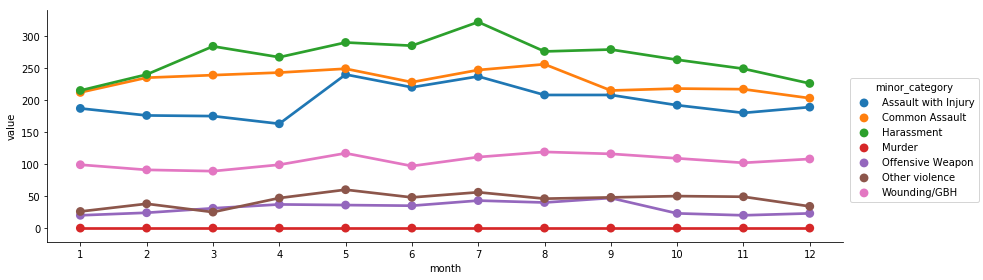

In [38]:
sns.factorplot(x='month', y='value', data=crlamminor, hue='minor_category', aspect=3)

In [39]:
crlam.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
122,E01003067,Lambeth,Violence Against the Person,Offensive Weapon,0,2016,4
160,E01003165,Lambeth,Violence Against the Person,Other violence,0,2016,7
574,E01003081,Lambeth,Violence Against the Person,Harassment,2,2016,8
1111,E01003045,Lambeth,Violence Against the Person,Wounding/GBH,1,2016,6
1736,E01003038,Lambeth,Violence Against the Person,Harassment,1,2016,9


In [40]:
crlamhar = crlam[ crlam['minor_category'] == 'Harassment' ]

crlamhar.shape

(2136, 7)

In [41]:
crlamharpv = pd.pivot_table(crlamhar, values='value', index='lsoa_code', aggfunc=np.sum)

crlamharpv.reset_index(inplace=True)

crlamharpv.head()

,lsoa_code,value
0,E01003013,79
1,E01003014,17
2,E01003015,10
3,E01003016,34
4,E01003017,25


In [42]:
map_har = folium.Map(location=[51.4571, -0.1231], tiles='Stamen Terrain', zoom_start=12)

map_har.choropleth(geo_data=lsoa_geo, data=crlamharpv,
                   columns=['lsoa_code', 'value'], key_on='feature.properties.LSOA11CD',
                   fill_color='GnBu', fill_opacity=0.7, line_opacity=0.3,
             legend_name='Lambeth Harassment in 2016')    

map_har

In [43]:
crallminor = pd.pivot_table(crorig, values='value', index=['year', 'minor_category'], aggfunc=np.sum)

crallminor.reset_index(inplace=True)

crallminor.head()

,year,minor_category,value
0,2008,Assault with Injury,56586
1,2008,Burglary in Other Buildings,31437
2,2008,Burglary in a Dwelling,56655
3,2008,Business Property,2964
4,2008,Common Assault,37356


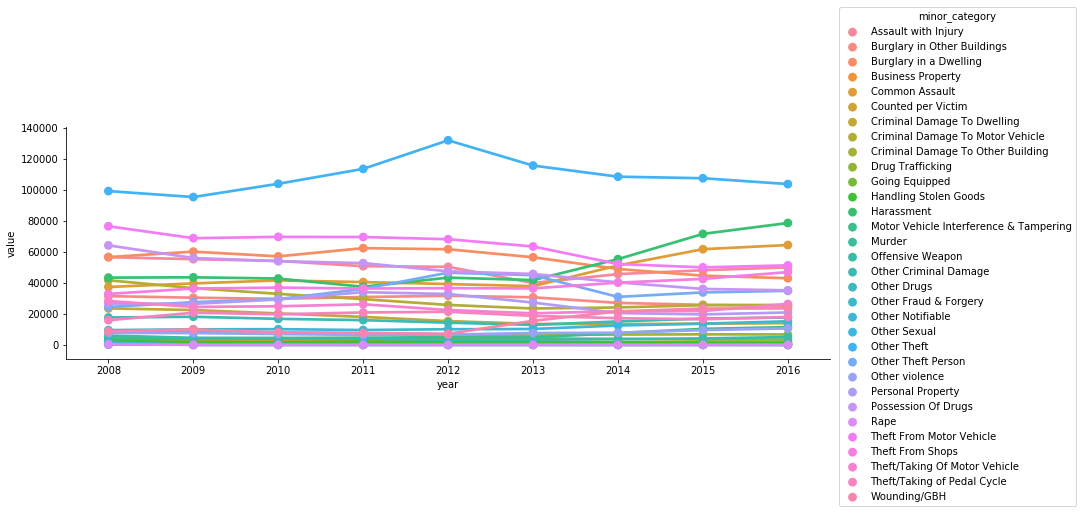

In [44]:
sns.factorplot(x='year', y='value', data=crallminor, hue='minor_category', aspect=3)

In [65]:
crallminorsum = pd.pivot_table(crorig, values='value', index=['minor_category'], aggfunc=np.sum)

crallminorsum.reset_index(inplace=True)

crallminorsum.head()

,minor_category,value
0,Assault with Injury,451001
1,Burglary in Other Buildings,263011
2,Burglary in a Dwelling,491282
3,Business Property,21295
4,Common Assault,413690


In [66]:
crallminorsum.sort_values(by=['value'], ascending=False, inplace=True)

crallminorsum.head()

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
12,Harassment,458124
0,Assault with Injury,451001


In [67]:
crallminorsum = crallminorsum[:20]

crallminorsum.head(10)

,minor_category,value
21,Other Theft,980085
27,Theft From Motor Vehicle,569956
2,Burglary in a Dwelling,491282
12,Harassment,458124
0,Assault with Injury,451001
25,Possession Of Drugs,431948
4,Common Assault,413690
28,Theft From Shops,345142
22,Other Theft Person,308842
7,Criminal Damage To Motor Vehicle,265463


In [68]:
crorig.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
